# Evaluation

## Objectif

L'objectif de cette évaluation est de parvenir à détecter si une requête est une tentative d'intrusion ou bien une requête légitime.

Votre modèle devrait obtenir un score de 95%.

## Livrable

Vous devrez compléter ce notebook Jupyter et répondre aux questions du Google Form associé [EPSI - PARIS - 2026 - TRDE707 - TP Noté](https://forms.gle/ZhcULFdgYDDm4P7Q9).

## Dépendances et modules

Les modules disponibles pour l'exécution de ce notebook sont :
* pandas
* scikit-learn
* matplotlib

## Source de données

Les sources de données sont des fichiers au format CSV. Vous pouvez les télécharger depuis le dossier [trde707-datasets](https://drive.google.com/drive/folders/1YmNxtXDhiyzoyH6R6twWudgdjUAYvsNo?usp=sharing).

L'archive public_network_log.zip contient un unique fichier public_network_log.csv qui représente un log de requêtes identifiées comme une tentative d'intrusion ou une requête légitime.

L'archive dbip-country-lite-2026-01.zip contient un unique fichier dbip-country-lite-2026-01.csv qui associe à chaque plage d'IP un code Pays. Cette base de données est issue du portail [dbip](https://db-ip.com/db/format/ip-to-country/csv.html).

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

charger les données

In [10]:
df = pd.read_csv('/content/public_network_logs.csv')


Effectifs de la colonne Intrusion

In [11]:

print(df['Intrusion'].value_counts())


Intrusion
0    6400
1     676
Name: count, dtype: int64


Représentations pour Payload_Size (Histogramme et Boxplot sont les plus adaptés)

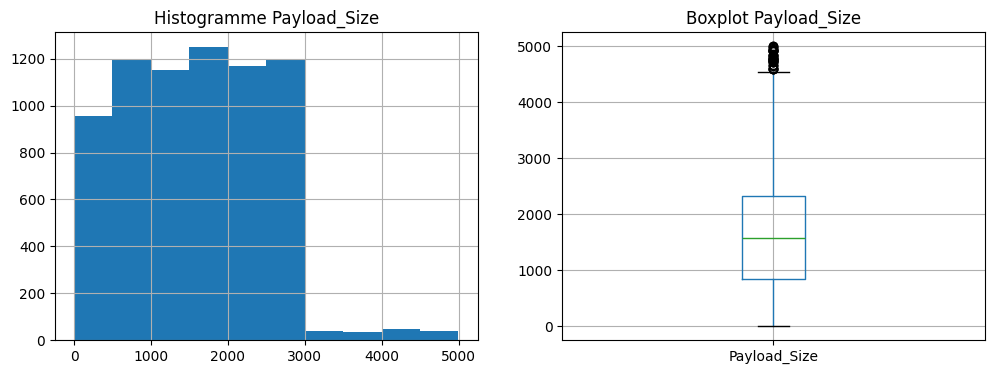

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
df['Payload_Size'].hist(ax=ax1)
ax1.set_title('Histogramme Payload_Size')
df.boxplot(column='Payload_Size', ax=ax2)
ax2.set_title('Boxplot Payload_Size')
plt.show()

Représentation pour Port (Bar chart des fréquences)


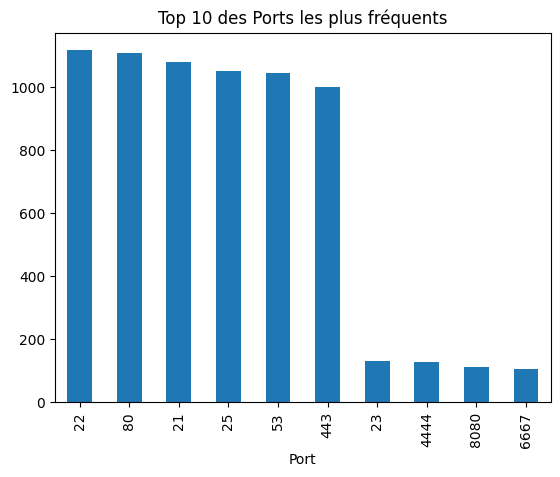

In [13]:
df['Port'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des Ports les plus fréquents')
plt.show()

Graphique combiné (Scatter plot)

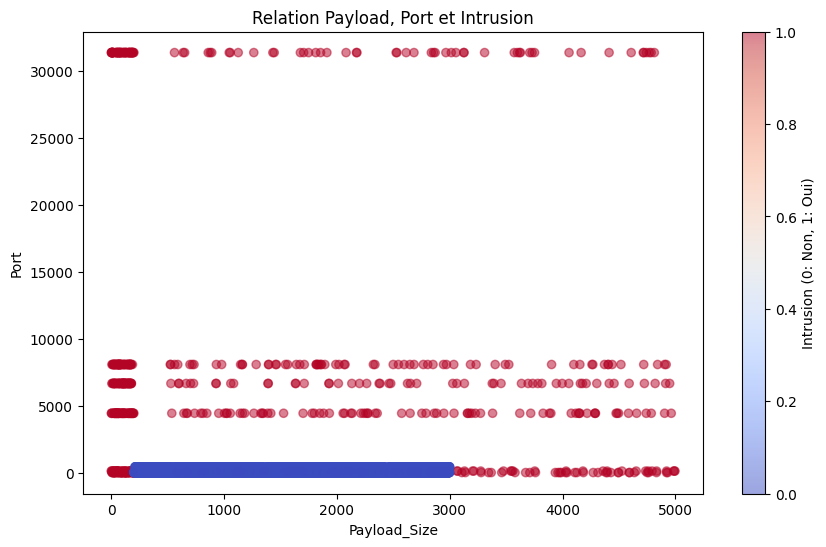

In [14]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Payload_Size'], df['Port'], c=df['Intrusion'], cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter, label='Intrusion (0: Non, 1: Oui)')
plt.xlabel('Payload_Size')
plt.ylabel('Port')
plt.title('Relation Payload, Port et Intrusion')
plt.show()

On identifie les colonnes de type 'object' (texte)
Typiquement : 'Protocol', 'Flags', ou le code pays si tu as fait le merge.

In [15]:
cols_to_encode = df.select_dtypes(include=['object']).columns.tolist()
print(f"Colonnes à encoder : {cols_to_encode}")

Colonnes à encoder : ['Source_IP', 'Destination_IP', 'Request_Type', 'Protocol', 'User_Agent', 'Status', 'Scan_Type']


Application de l'encodage (LabelEncoder ou OneHotEncoder)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))



Typiquement 'Payload_Size' et 'Port'

In [21]:
cols_to_scale = ['Payload_Size', 'Port']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Définition de X (features) et y (cible)

In [22]:
X = df.drop(columns=['Intrusion'])
y = df['Intrusion']


Split 80% train / 20% test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialisation et entraînement

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Modèle entraîné avec succès !")
y_pred = model.predict(X_test)

Modèle entraîné avec succès !


Score et rapport

In [25]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1267
           1       1.00      1.00      1.00       149

    accuracy                           1.00      1416
   macro avg       1.00      1.00      1.00      1416
weighted avg       1.00      1.00      1.00      1416



Affichage des performances (Matrice de confusion)


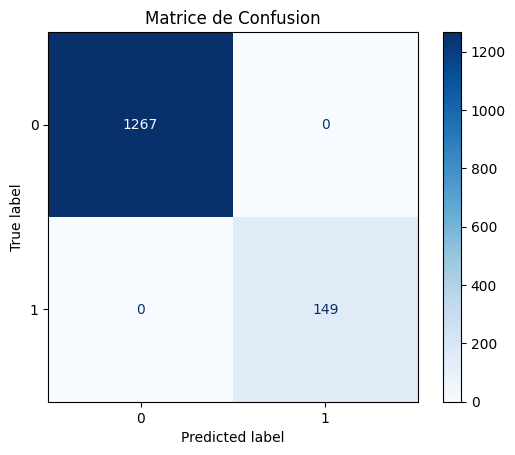

In [26]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Matrice de Confusion')
plt.show()